In [1]:
import sympy
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
ps = list(sympy.primerange(3, 3000))
df = pd.DataFrame({'p':ps})
df['bit'] = df['p'].apply(lambda x: len(bin(x)[2:]))
df

,p,bit
0,3,2
1,5,3
2,7,3
3,11,4
4,13,4
...,...,...
424,2957,12
425,2963,12
426,2969,12
427,2971,12


In [ ]:
command = """CUDA_VISIBLE_DEVICES={} python experiment_theorem1.py --p {}"""
batch_size = 2
commands = []
#split to 2 GPUs, run in parallel
for i in range(len(ps)):
    commands.append(command.format(str(int((i%batch_size)>(batch_size-1)//2)), ps[i]))


In [ ]:
epochs = int(np.ceil(len(commands)/batch_size))
for i in tqdm(range(epochs)):
    os.system(" & ".join(commands[i*batch_size:(i+1)*batch_size]))
    print('hello')

In [2]:
import pandas as pd
import glob
df = []
#read data
for filename in glob.glob('results/*.csv'):
    df.append(pd.read_csv(filename))
df = pd.concat(df)
len(bin(df['p'].max())[2:])

12

In [3]:
df['scaled_norm_p'] = (df['p']**(0.5))*df['scaled_norm']

In [4]:
df['scaled_norm_p2'] = df['p']*df['scaled_norm']

<Axes: xlabel='p', ylabel='scaled_norm'>

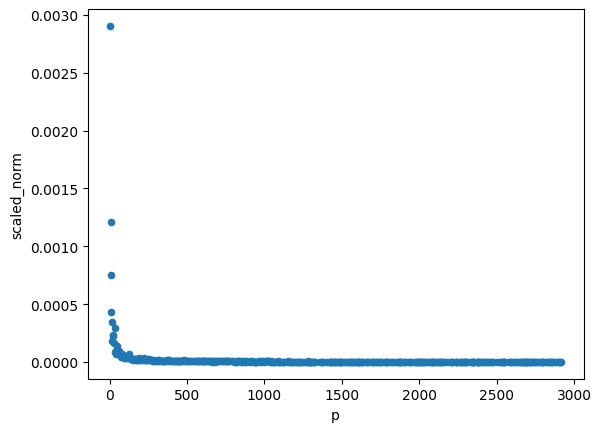

In [5]:
df.groupby('p')['scaled_norm'].mean().reset_index().plot(x='p', y='scaled_norm',kind='scatter')

<Axes: xlabel='p', ylabel='norm_mean'>

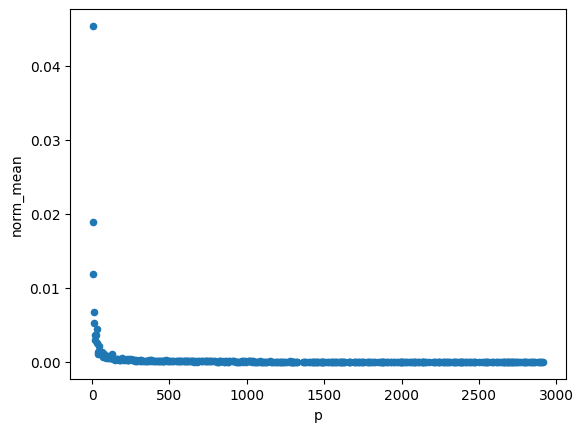

In [6]:
df.groupby('p')['norm_mean'].mean().reset_index().plot(x='p', y='norm_mean',kind='scatter')

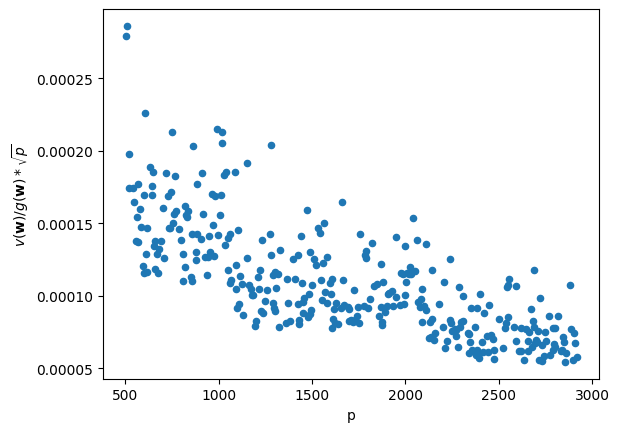

In [7]:
import matplotlib.pyplot as plt
df[df['p']>500].groupby('p')['scaled_norm_p'].mean().reset_index().plot(x='p', y='scaled_norm_p',kind='scatter')
plt.ylabel('$v(\mathbf{w})/g(\mathbf{w})*\sqrt{p}$')
plt.rcParams.update({'font.size': 14})
plt.show()

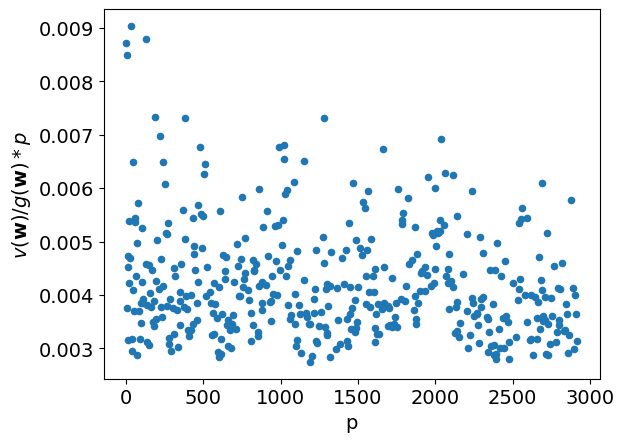

In [8]:
df.groupby('p')['scaled_norm_p2'].mean().reset_index().plot(x='p', y='scaled_norm_p2',kind='scatter')
plt.ylabel('$ v(\mathbf{w})/g(\mathbf{w})*p$')
plt.rcParams.update({'font.size': 14})
plt.show()